# Trabalhando com Categorical Features
- Scikit-learn não aceita valores categoricos por default
- É necessário tornar os valores categóricos em valores numéricos
- Conversão para `dummy variables`
    - 0: Observação não foi dessa categoria
    - 1: Observação foi dessa categoria
    

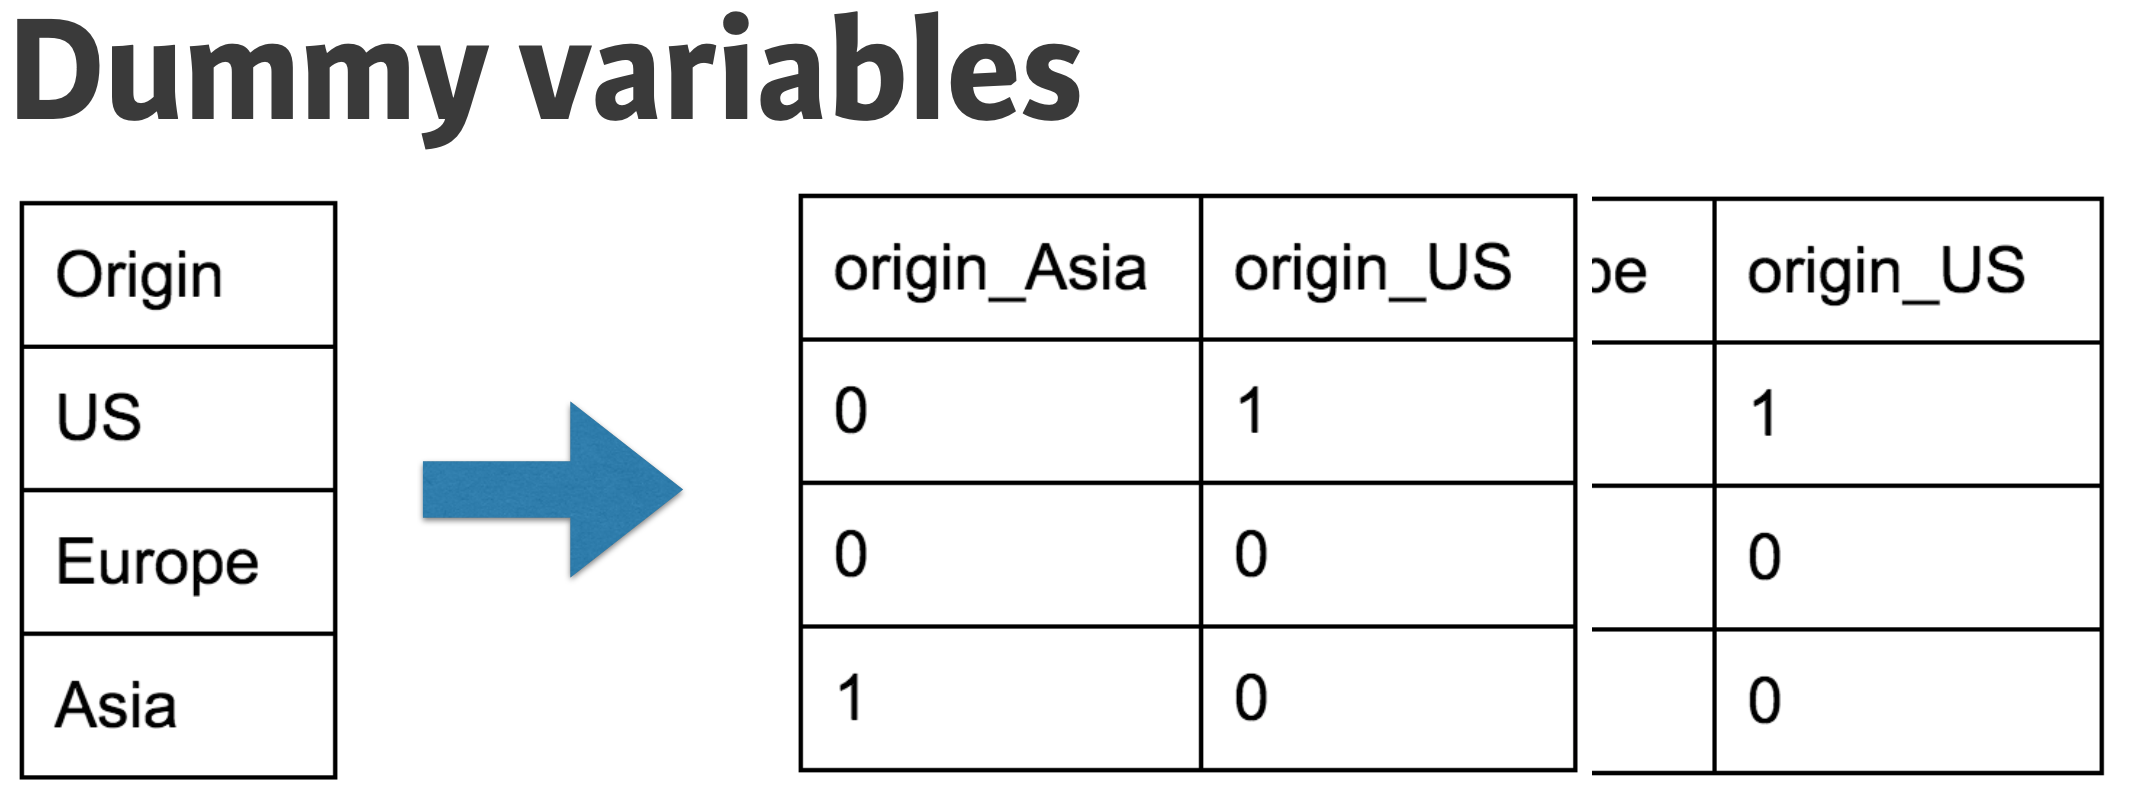

# Tratando categorical features em Python
- scikit-learn: `OneHotEncoder()`
- pandas: `get_dummies()`


# Automobile dataset
- mpg: Target Variable
- Origin: categorical Feature

In [1]:
import pandas as pd
df = pd.read_csv('/Users/marcosdeoliveira/auto.csv')

In [2]:
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [3]:
df_origin = pd.get_dummies(df)

In [4]:
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [5]:
df_origin = df_origin.drop('origin_Asia', axis=1)

In [6]:
df_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


# Linear Regression usando dummy variables

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import Ridge

In [12]:
X = df_origin.drop('mpg', axis=1).values
y = df_origin['mpg'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

In [15]:
ridge.score(X_test, y_test)

0.7190645190217895

# Tratando falta de dados (missing data)

In [33]:
df = pd.read_csv('/Users/marcosdeoliveira/diabetes.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [36]:
import numpy as np

In [37]:
df.insulin.replace(0, np.nan, inplace = True)

In [38]:
df.triceps.replace(0, np.nan, inplace = True)

In [39]:
df.bmi.replace(0, np.nan, inplace = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


# Uma estratégia é deletar observações com falta de informação

In [25]:
df = df.dropna()

In [26]:
df.shape # muitas observações foram perdidas

(393, 9)

# Outra estratégia é adicionar informação as observações com problema
- por exemplo podemos fazer a média dos valores que não estão faltando na feature ou repetir o valor mais comum 

In [49]:
from sklearn.preprocessing import Imputer 

In [50]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35.0,NaN,33.6,0.627,50,1
1,1,85,66,29.0,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1


In [43]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #axis=0 para colunas e 1 para linhas

/Users/marcosdeoliveira/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [56]:
X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values

In [57]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [58]:
imp.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [59]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [60]:
X = imp.transform(X)

In [61]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# Usando pipelines


In [62]:
X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
logreg = LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


/Users/marcosdeoliveira/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
pipeline.fit(X_train, y_train)

/Users/marcosdeoliveira/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('imputation',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='mean', verbose=0)),
                ('logistic_regression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [65]:
y_pred = pipeline.predict(X_test)

In [68]:
pipeline.score(X_test, y_test)

0.7619047619047619

# Normalização

In [73]:
df_wine = pd.read_csv('/Users/marcosdeoliveira/winequality-red.csv', sep=';')

In [74]:
print(df_wine.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [89]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Porque normalizar seus dados?
- Muitos modelos usam alguma forma de distancia com informação
- Features em grandes escalas podem influenciar indevidamanete o modelo
- Exemplo: k-NN usa explicitamente distância quando realizando predissões
- Nos desejamos que as features etejam em escalas similares
- Normalizing (or scaling and centering)

# Maneiras de normalizar seus dados
- Standardization: Subtrair a média e dividir pela variância
    - Todas as features são centered em torno de zero e e tem variância igual a um
- Pode-se também subtrair o mínimo e dividir pela quantidade (range)
    - Mínimo zero e máximo um
- Pode-se também normalizar de maneira que os dados estejam entre -1 e +1

In [145]:
X = df_wine.drop('quality', axis=1).values

y = df_wine['quality'].values

In [146]:
z = [] #tranformando a target variable quanlity em um valor binário
for x in np.nditer(y):
    if x<5:
        z.append(1)
    else:
        z.append(0)
        

In [147]:
z = np.array(z)

In [148]:
y

array([5, 5, 5, ..., 6, 5, 6])

In [149]:
z

array([0, 0, 0, ..., 0, 0, 0])

In [151]:
y = z

In [152]:
from sklearn.preprocessing import scale
X_scaled = scale(X)
print(np.mean(X), np.std(X))
print(np.mean(X_scaled), np.std(X_scaled))

8.134219224515322 16.726533979432848
2.546626531486538e-15 1.0


# Normalização no Pipeline

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(accuracy_score(y_test, y_pred))
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))


0.95
0.946875


In [197]:
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors' : np.arange(1, 50)} #
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [198]:
print(cv.best_params_)

{'knn__n_neighbors': 4}


In [199]:
print(cv.score(X_test, y_test))

0.95


In [200]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       303
           1       1.00      0.06      0.11        17

    accuracy                           0.95       320
   macro avg       0.97      0.53      0.54       320
weighted avg       0.95      0.95      0.93       320

